In [1]:
import csv
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import math

In [2]:
def training(X_train, y_train, TARGET_M, regularize = False, lamda = 1):
    
    x_mat = polynomial_function(X_train, TARGET_M)
    
    if regularize == True:
        X_trans = x_mat.T * x_mat
        X_trans = X_trans  + eye(shape(X_trans)[0])*lamda # problem
    else:
        X_trans = x_mat.T * x_mat
    #print(X_trans.shape)
    W = linalg.inv(X_trans) * ( x_mat.T* y_train)
    
    return x_mat, W,  X_trans

In [3]:
def polynomial_function(data, M ):
    
    all_mat = []
    
    for val in data:

        val_vector = [ powers(val, i) for i in range(0, M+1)]
        all_mat.append(val_vector)   
    
    all_mat = mat(all_mat)
    return all_mat

In [4]:
def powers(val, power):
    
    if power == 0:
        return 1.0
    else:
        return np.power(val, power)

In [5]:
def plot(matX, x_list, y_list, W):

    plt.scatter(x_list, y_list,  color='black')

    matX = mat(matX)
    xcopy = matX.copy()
    xcopy.sort(0)

    yHat = xcopy*W
    plt.plot(xcopy[:, 1], yHat)
    plt.show()

In [6]:
def error_cost(data, W, y_data):
    
    prediction = data*W
    
    Erms = prediction - y_data
    Erms = np.power(Erms, 2)
    Erms = Erms.sum()
    Erms = Erms/y_data.shape[0]
    Erms = Erms** 0.5
    #Erms = np.square( 2*E/ len(y_data))
    return Erms

In [7]:
y_list = []
x_list = []
with open('./data/4_test.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        if 't' in row[0]:
            continue
        else:
            row = row[0].split(',')
            y_list.append(double(row[0]))
            x_list.append(double(row[1]))

X_test = np.array(x_list)
y_test = np.array(y_list)
y_test = y_test.reshape((len(y_test)), 1)

In [8]:
y_list = []
x_list = []
with open('./data/4_train.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        if 't' in row[0]:
            continue
        else:
            row = row[0].split(',')
            y_list.append(float(row[0]))
            x_list.append(float(row[1]))

X_train = np.array(x_list)

y_train = np.array(y_list)
y_train = y_train.reshape((len(y_train)), 1)

# (1)  (RMS) error 

In [9]:
train_error = [0]
test_error = [0]

for M in range(1, 10):
    
    print('--M--:', M)
    train_mat, W,  X_trans = training(X_train, y_train, M)
    error = error_cost(train_mat, W, y_train)
    train_error.append(error)
    
    test_mat = polynomial_function(X_test, M)
    
    error2 = error_cost(test_mat, W, y_test)
    test_error.append(error2)
    
    print('traning:',error)
    print('testing:', error2)

--M--: 1
traning: 2.43625016533
testing: 2.55512423758
--M--: 2
traning: 2.09847079707
testing: 2.272433502
--M--: 3
traning: 2.09426470667
testing: 2.20199758179
--M--: 4
traning: 2.0678005492
testing: 2.08337259908
--M--: 5
traning: 1.11914381432
testing: 1.25146852388
--M--: 6
traning: 1.11663205567
testing: 1.21720169346
--M--: 7
traning: 0.836488442361
testing: 1.56119734536
--M--: 8
traning: 0.816067604019
testing: 1.48315795401
--M--: 9
traning: 0.752874113482
testing: 1.55950693899


#  Plot the training and test error for various order M. Explain which order will cause the overfitting problem.

### Explain: 

### Overfitting is a problem for training model. It means model fits training data too well, and predict training data, but loses some ability to predict testing data well.  

### From the picture below, beginning from M =  6, we can see the curve of testing graudally  goes up, but the curve of testing goes down. Hence, we can say after M >=6, model will cause overfitting problem.

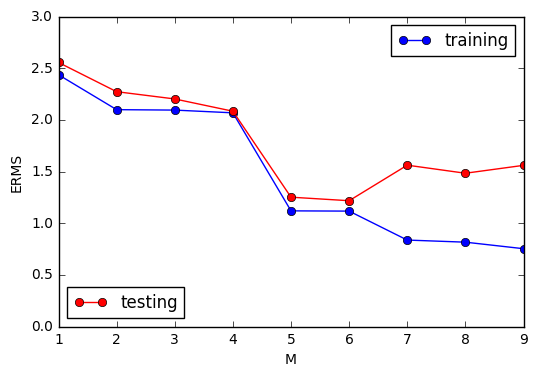

In [10]:
p1, = plt.plot(train_error, '-ko', color='blue', label='training')

p2, = plt.plot(test_error, '-ko', color='red', label='testing')


l1 = plt.legend([p1], ["training"], loc=1)
l2 = plt.legend([p2], ["testing"], loc=3) # this removes l1 from the axes.

plt.axis([1, 9, 0, 3])
plt.gca().add_artist(l1) # add l1 as a separate artist to the axes

plt.xlabel('M')
plt.ylabel('ERMS')
plt.show()

# (3) Considering the regularized error function M= 9

In [11]:
M = 9 # M =9
train_cost = []
test_cost = []

for lambdas in range(-20, 1 , 1): # lamda from -20 to 0
    
    lambdas = np.exp(lambdas)
    train_mat, W,  X_trans = training(X_train, y_train, M, regularize = True, lamda = lambdas)
    test_mat = polynomial_function(X_test, M)
    
    train_cost.append(error_cost(train_mat, W, y_train))
    test_cost.append(error_cost(test_mat, W, y_test))

In [12]:
j = -20
for i in train_cost:
    print('lamba', str(j), 'Regularize train Error:', i)
    j+=1

lamba -20 Regularize train Error: 0.752874113716
lamba -19 Regularize train Error: 0.752874114559
lamba -18 Regularize train Error: 0.75287411848
lamba -17 Regularize train Error: 0.752874134366
lamba -16 Regularize train Error: 0.7528742381
lamba -15 Regularize train Error: 0.752874930135
lamba -14 Regularize train Error: 0.752879867548
lamba -13 Regularize train Error: 0.752915231922
lamba -12 Regularize train Error: 0.753158725921
lamba -11 Regularize train Error: 0.754673897828
lamba -10 Regularize train Error: 0.762053274672
lamba -9 Regularize train Error: 0.784494718478
lamba -8 Regularize train Error: 0.819732432186
lamba -7 Regularize train Error: 0.848899327892
lamba -6 Regularize train Error: 0.864594666578
lamba -5 Regularize train Error: 0.87186337697
lamba -4 Regularize train Error: 0.878026160054
lamba -3 Regularize train Error: 0.896577325464
lamba -2 Regularize train Error: 0.952157341734
lamba -1 Regularize train Error: 1.04674033063
lamba 0 Regularize train Error: 1.

In [13]:
j = -20
for i in test_cost:
    print('lamba', str(j), 'Regularize test Error:', i)
    j+=1

lamba -20 Regularize test Error: 1.5594995584
lamba -19 Regularize test Error: 1.55949384801
lamba -18 Regularize test Error: 1.55949713981
lamba -17 Regularize test Error: 1.5594758397
lamba -16 Regularize test Error: 1.55940850778
lamba -15 Regularize test Error: 1.5592542269
lamba -14 Regularize test Error: 1.55883767344
lamba -13 Regularize test Error: 1.55772763526
lamba -12 Regularize test Error: 1.55488688011
lamba -11 Regularize test Error: 1.54828272525
lamba -10 Regularize test Error: 1.53595415442
lamba -9 Regularize test Error: 1.52104472888
lamba -8 Regularize test Error: 1.51146736193
lamba -7 Regularize test Error: 1.50840217647
lamba -6 Regularize test Error: 1.50838373598
lamba -5 Regularize test Error: 1.51036648172
lamba -4 Regularize test Error: 1.51682000336
lamba -3 Regularize test Error: 1.53626418763
lamba -2 Regularize test Error: 1.58387324697
lamba -1 Regularize test Error: 1.66047322911
lamba 0 Regularize test Error: 1.74205665059


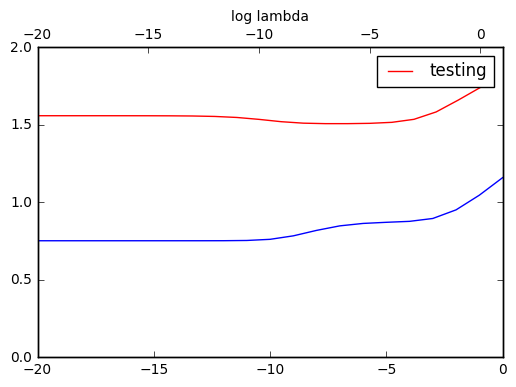

In [14]:
train_len = [ i for i in range(-20, 1, 1)]
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.plot(train_len, train_cost, 'b', label = 'trainging')

ax2 = ax1.twiny()
ax2.plot(train_len, test_cost, 'r', label = 'testing')

plt.xlabel('log lambda')
plt.ylabel('ERMS')

plt.axis([-20, 1, 0, 2])

plt.legend()
plt.show()